# 1. Setup

In [11]:
# some imports
import sys
import os
import MCMC_Noddy as mcmc
import GA_Noddy as GA
import PSO_basic as PSO
import NSGA_Noddy as NSGA
from glob import glob
import vedo as vtkP
import pandas as pd
import re 

# give correct permissions to the executable
folder = os.getcwd()
noddyEXE = folder+'/noddy_linux.exe'
strV = 'chmod 777 '+noddyEXE
os.system(strV)

0

# 2. Choose hyper parameters (don't be frightened - you can just run this and keep them all at default!)

In [12]:
nruns	2439
npop	25



HyperParameters = {}

# what optimisation method are you using?
# choose from ['MCMC', 'GA', 'NSGA', 'Annealing']
HyperParameters['OptimMethod']='GA'

# The number of faults in the model ::: (integer) ::: If less than 6, then it's a pre configured scenario
HyperParameters['ScenarioNum'] = 18

# how to shift the geophysical data to be similar to simulation values ['Median Datum Shift', 'Median Const Datum Shift']
HyperParameters['SimulationShiftType'] = 'Median Datum Shift'

# how to normalize each data type before combining them ::: ['MedianInitialRounds', 'Given']
HyperParameters['DatNormMethod'] = 'Given'
# you can also preconfigure what is the beginning error level for each datatype as follows. 
# this is used only if provided "given" in above option
HyperParameters['DatNormCoef'] = {'Grav': 2.4, 'Tracer': 1.0, 
                        'FaultMarkers': 500, 'GT': 315, 'Mag':300}

# In the MCMC and annealing method. Whether to have a multiplier on the 
# stepping size based on the error level. step = (Multiplier)*(error btwn 0-1)*perturbation 
# ::: ['LinearErrorBased', 'None']
HyperParameters['ExplorationRate'] = 'LinearErrorBased'
HyperParameters['SteppingSizeMult'] = 1/0.9

# Is the error calculated based on mismatch for all observed data from the whole model [Global], 
# or only data points that are local/around the location of the parameter/fault [Local]. 
HyperParameters['ErrorType'] = 'Global'

# If you choose "Local", then how often should you update what ares
# is considered local for every parameter (update once or many times)? :::['Once', 'Many']
HyperParameters['parameters']= 'Many'
# The local radius is calculated by taking the fault length, and this radius can be multiplied by a value. ::: [1, 2.5]
HyperParameters['localWeightRadiusMult']= 1.5
# after how many rounds update the area designated as local? and every how many rounds recalculate?
HyperParameters['StartUpdateLocalWeight']= 45
HyperParameters['localWeightRadiusMult']= 35

# The norm used for the optimisation ::: ['L1', 'L2', 'Lhalf']
HyperParameters['ErrorNorm'] = 'L1'

# For MCMC and annealing, should you set the initial rounds as exploratory, without any optimisation/search/update
HyperParameters['ExplorationStage'] = 'Explore'
# The number of exploration rounds ::: integer
HyperParameters['nExploreRuns'] = 50

# What is the normalization constant in the MCMC (std of the error)? 
# It can be set to achieve a certain acceptance rate, for example.
#::: ['Track Acceptance', 'Error must decrease', 'Const diff']
HyperParameters['AcceptProbType'] = 'Track Acceptance'
# If you want to have a target acceptance, that what is the goal? ::: range(0,1)
HyperParameters['AcceptanceGoal'] = 0.2
# If you want a constant number, set it here
HyperParameters['ConstNormFactor'] = 0.01

# cube size for the model
HyperParameters['cubesize'] = 150

# What is the largest amount the faults can move from their original placed location
HyperParameters['GlobalMoveEachDir'] = 700
# What is the std of the step size for this movement?
HyperParameters['XYZ_Axes_StepStd'] = 100
# Std for the step size of the fault dip
HyperParameters['Dip_StepStd'] = 3
# Std for the step size of the fault slip
HyperParameters['Slip_StepStd'] = 70
# Std for the step size of the fault dip direction
HyperParameters['DipDirection_StepStd'] = 7
# The ratio between fault length to fault slip
HyperParameters['SlipParam'] = 0.1

# Maximum range of the stratigraphy rotation
HyperParameters['AzimuthMoveEachDirection'] = 5
# Maximum change in dip
HyperParameters['DipMoveEachDirection'] = 35
# Maximum shrinking/expanding of fault amplitude
HyperParameters['AmplitudeRatioChange'] = 0.15

HyperParameters['AxisRatioChange'] = 0.1

# The maximum misfit error per fault marker (otherwise can be inf)
HyperParameters['MaxFaultMarkerError'] = 525

HyperParameters['MO_WeightingMethod'] = 'Proportions'
HyperParameters['MCMC_SwitchWeightFreq'] = 20

Thread_num = 0 
HyperParameters['thread_num'] = Thread_num        
# don't do the toy run
HyperParameters['Toy']=False

# do you want some extra output
HyperParameters['verbose']=True

# where to output results
HyperParameters['BaseFolder']='Combo_Scratch'

HyperParameters['DataTypes'] = ['Grav', 'Mag', 'GT', 'FaultMarkers','Tracer']

# origin of the model
HyperParameters['xy_origin']=[316448, 4379166, -2700]

# extent of the model
HyperParameters['xy_extent'] = [8850, 9000,3900]

HyperParameters['verbose']=True    

# index of the granite layer
HyperParameters['graniteIdx'] = 4

# is this a Windows computer? (you are probably running this using binder on the server, which is linux)
HyperParameters['Windows'] = False

# are you running this from a jupyter notebook? or your terminal
HyperParameters['jupyter'] = True

# Annealing
HyperParameters['AcceptProbType'] = 'Annealing'

# Annealing: what is the initial temperature? ::: [0.001, 0.025]
HyperParameters['InitialTemperature'] = 0.01
# Annealing: what is the ReductionRate? ::: [0.95, 0.999]
HyperParameters['ReductionRate'] = 0.965

# how much weight to give to each data type? (multi objective)
# equal? randomly set the proportions? all weight to single data type, but switch around every few rounds?
# ::: ['Proportions', 'Extreme', 'Equal']
HyperParameters['MO_WeightingMethod'] = 'Equal'
# if "extreme", every how many rounds switch the weights? ::: integer
HyperParameters['MO_SwitchWeightFreq'] = 2
# rounds are shorter for MCMC, so can have more rounds before switching
HyperParameters['MCMC_SwitchWeightFreq'] = 20

# Genetic algorithms parameters (incl. NSGA)
# #########################################

# number of individuals/models in the population ::: [25, 80]
HyperParameters['npop'] = 35
    
# what is the selection method? ::: ['selTournament', 'selStochasticUniversalSampling', 'selRoulette']
HyperParameters['SelectionMethod'] = 'selTournament'
# what is the tournament size? ::: [4,12]
HyperParameters['TournamentSize'] = 5

# what is the mating method? ::: ['cxTwoPoint','cxOnePoint','cxUniform']
HyperParameters['MatingMethodGlobal'] = 'cxTwoPoint'

# what is the mating method for a local formulation? ::: ['cxOnePointLocal','cxTwoPointLocal', 'cxLocalErrorPropExchange']
HyperParameters['MatingMethodLocal'] = 'cxLocalErrorPropExchange'

# parameter used in the mating algorithms ::: [0.6, 1] 
HyperParameters['MatingSwapRange'] = 0.7

# parameter used in the mating algorithm cxUniform ::: [0.3, 0.7]
HyperParameters['MatingSwapProb'] = 0.4

# What is the mating probability ::: [0.6, 1] or [0-1] in general
HyperParameters['IndMatingProb'] = 0.9

# what is the mutating method? ::: ['mutPolynomialBounded', 'mutGaussian', 'mutUniformFloat']
HyperParameters['MutatingMethod'] = 'mutPolynomialBounded'

# parameter used in the algorithm mutPolynomialBounded ::: [80, 120]
HyperParameters['Eta'] = 100

# What is the individual mutating probability ::: [0.2, 0.4] or [0-1] in general
HyperParameters['IndMutatingProb'] = 0.3
HyperParameters['PbMutateParameter'] = 0.25

HyperParameters['LocalWeightsMode'] = 'na'

# 3. Run and view results every x times (x=output image frequency)

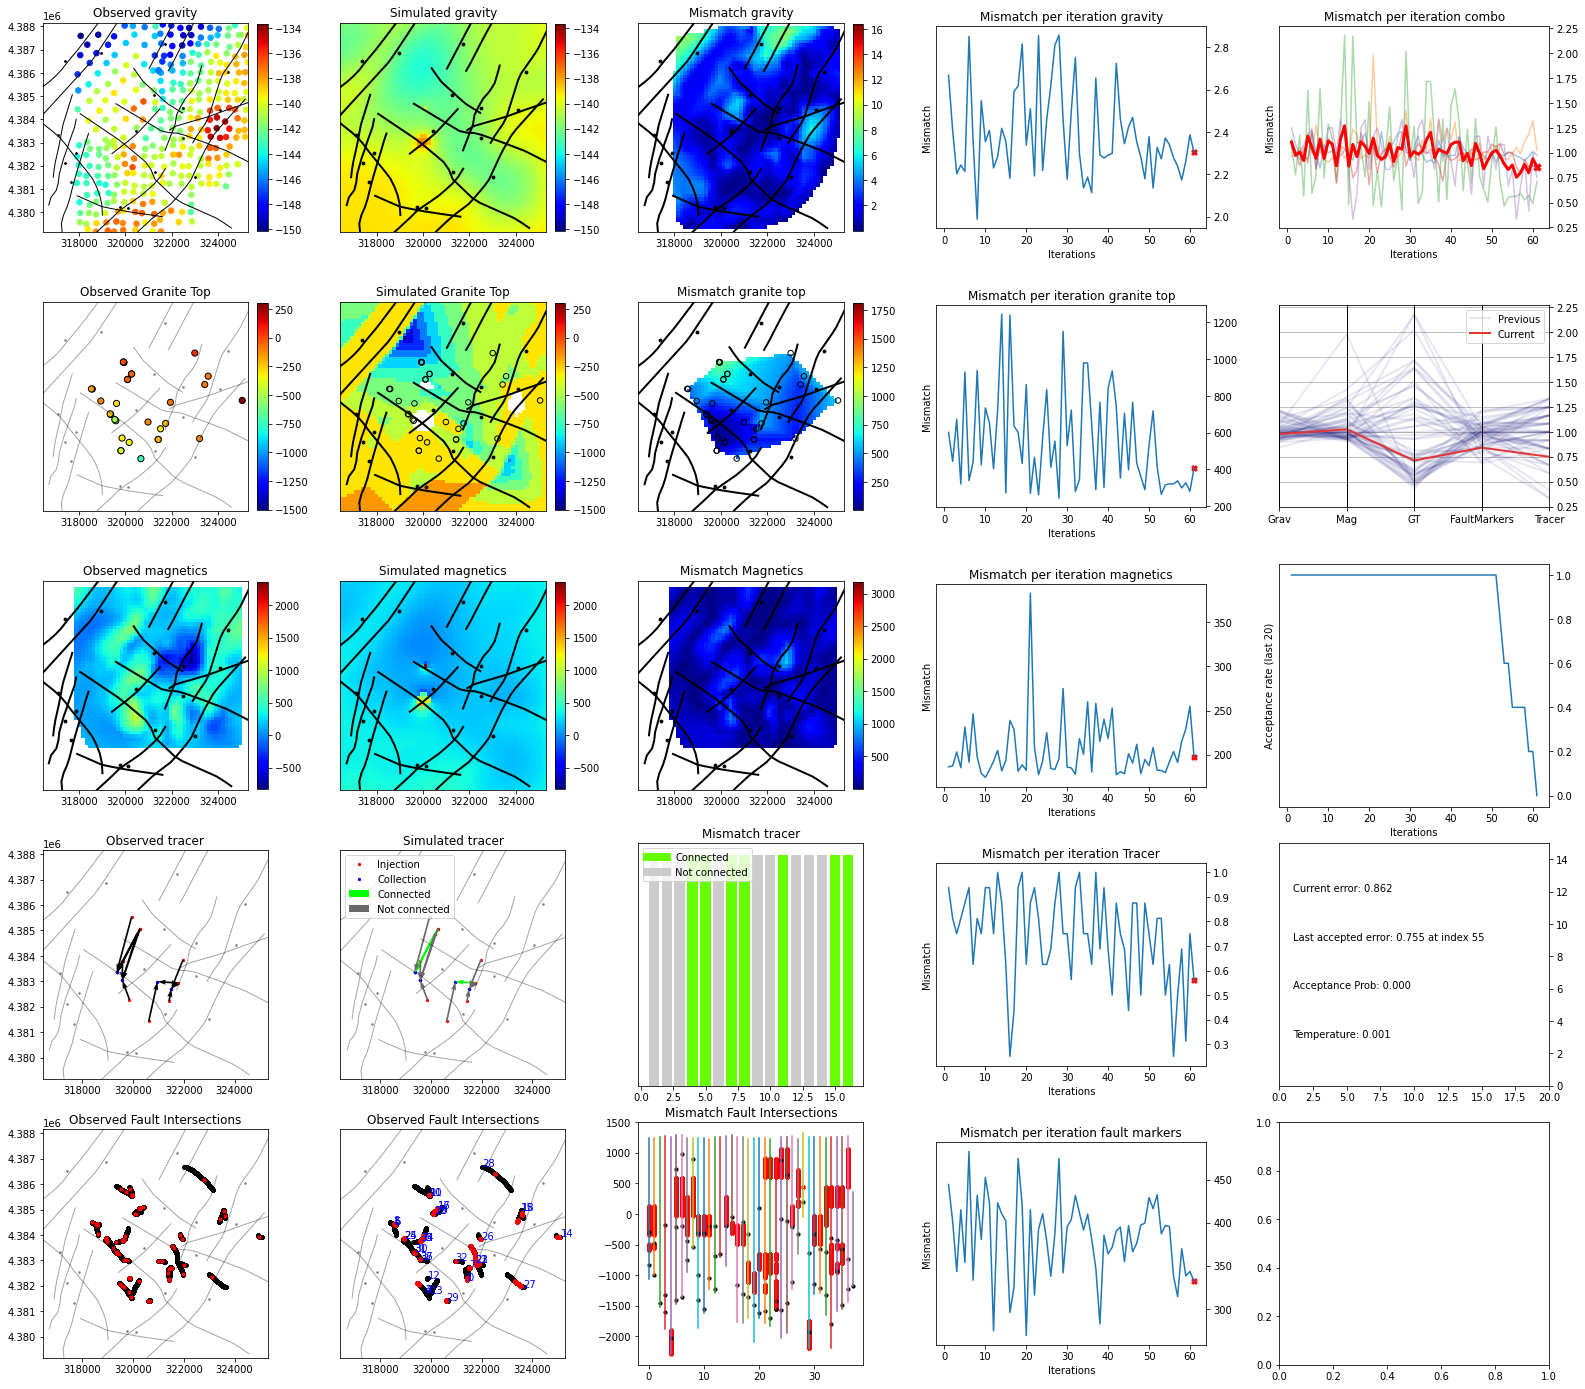

Run Number: 61
Finished calculating geology and topology
Finished calculating gravity and magnetics
normalizingFactor: 0.0011380625018799656
acceptanceProbability: 4.860418285319685e-19
Accepted percentage: 0.8688524590163934
Last Combo Error: 0.8029491051742248
Run Number: 62
Finished calculating geology and topology
Finished calculating gravity and magnetics
normalizingFactor: 0.0010982303143141667
acceptanceProbability: 1.6409700763819574e-60
Accepted percentage: 0.8548387096774194
Last Combo Error: 0.9061414795905479
Run Number: 63
Finished calculating geology and topology
Finished calculating gravity and magnetics
normalizingFactor: 0.001059792253313171
acceptanceProbability: 1.0865568850459026e-10
Accepted percentage: 0.8412698412698413
Last Combo Error: 0.7792739353762641
Run Number: 64
Finished calculating geology and topology
Finished calculating gravity and magnetics
normalizingFactor: 0.0010226995244472098
acceptanceProbability: 1.2955555851138167e-35
Accepted percentage: 0.

In [13]:
HyperParameters['nruns']=20
HyperParameters['OutputImageFreq'] = 15        
HyperParameters['OptimMethod']='GA'

if(HyperParameters['OptimMethod']=='MCMC'):
    mcmc.MCMC_Noddy(HyperParameters)        
elif(HyperParameters['OptimMethod']=='GA'):
    GA.GA_Noddy(HyperParameters)            
elif(HyperParameters['OptimMethod']=='Annealing'):
    mcmc.MCMC_Noddy(HyperParameters)                    
elif(HyperParameters['OptimMethod']=='NSGA'):
    NSGA.NSGA2_Noddy(HyperParameters)                            

# 4. Find the model with least error

In [14]:
#Loop through all of the files and take the best and and another 5 random ones and copy them over
def GetIterationNumFromFile(file):
    result = re.search('G_(.*)_Err', file)
    return int(result.group(1))

def GetErrFromFile(file):
    result = re.search('Err_(.*).his', file)
    return float(result.group(1))

folder = os.getcwd()+'/Combo_Scratch/Thread'+str(Thread_num)+'/HistoryFileInspection/'
files = glob(folder+'*.his')
nFiles = len(files)

MasterFileList = []
ErrV=1000000.0
bestIter=0
for i in range(nFiles):
    file_i = files[i]
    print('reading: '+ file_i)
    Err=GetErrFromFile(file_i)
    Iter=GetIterationNumFromFile(file_i)
    if(Err<ErrV):
        ErrV = Err
        bestIter = Iter
        best_model_file = file_i

print('best file is: ' + best_model_file)

reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_30_Err_212507.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_15_Err_188562.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_60_Err_734.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_30_Err_262940.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_45_Err_265212.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_60_Err_862.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_0_Err_247257.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_15_Err_355429.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_45_Err_148513.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_0_Err_250202.his
best file is: /home/jovyan/code/Combo_

# 5. Plot in 3D

In [15]:
import plot3d_util as plt3d
import vedo as vtkP
import pandas as pd
from scipy.spatial import Delaunay
vtkP.settings.embedWindow('k3d') #you can also choose to change to itkwidgets, k3d

In [21]:
#Alter the mesh size if desiring to speed up the process. Recommended size is 100
output_name = 'noddy_out'
cubesize = 100
includeGravityCalc = 0
xy_origin=[316448, 4379166, -2700]

plot = vtkP.Plotter(axes=1, bg='white', interactive=1)
plt3d.plot_3d_model(best_model_file, cubesize, plot, xy_origin=[316448, 4379166, -2700])

# add topography
##################
# perform a 2D Delaunay triangulation to get the cells from the point cloud
landSurfacePD = pd.read_csv("Data/TopographyNew2.csv")
landSurfacePD = landSurfacePD[['X', 'Y', 'rvalue_1']].values
tri = Delaunay(landSurfacePD[:, 0:2])

# create a mesh object for the land surface
landSurface = vtkP.Mesh([landSurfacePD, tri.simplices])

# in order to color it by the elevation, we use the z values of the mesh
zvals = landSurface.points()[:, 2]
landSurface.pointColors(zvals, cmap="terrain", vmin=1000)
landSurface.name = "Land Surface" # give the object a name

plot+=landSurface

# add wellbores
###########################
wells = pd.read_csv('Data/AllWellPathsData.csv')
well_names = pd.unique(wells['WellName'])
for wn in well_names:
    filterWN = wells['WellName']==wn
    well = wells[filterWN]
    well=well[['Xm', 'Ym', 'Zm']].values
    Well = vtkP.Line(well).color('red').lw(4)
    Well.name = wn
    plot += Well.flag()
    
plot.show(viewup='z')

Calculation time took 24.74551033973694 seconds
Finished reading model
Parsing time took 6.210240840911865 seconds
The number of triangle elements (cells/faces) is: 168519
Convert 2 VTK time took 0.8589560985565186 seconds


Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[329665.2562064628,…